In [9]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint

def ribofinal(y, t, rates, parameters):
	dm= rates[0]
	kb= rates[1]
	ku= rates[2]

	Kp= parameters[0]
	thetar= parameters[1]
	kq= parameters[2]
	thetax= parameters[3]
	numr0= parameters[4]
	numq0= parameters[5]
	nume0= parameters[6]
	gmax= parameters[7]
	aatot= parameters[8]
	vt= parameters[9]
	Kt= parameters[10]
	s0= parameters[11]
	vm= parameters[12]
	Km= parameters[13]
	ns= parameters[14]
	nq= parameters[15]
	nr= parameters[16]
	nx= parameters[17]
	rho= parameters[18]  
    
	a= y[0]
	em= y[1]
	et= y[2]
	mm= y[3]
	mq= y[4]
	mr= y[5]
	mt= y[6]
	q= y[7]
	r= y[8]
	rm1m= y[9]
	rm1q= y[10]
	rm1r= y[11]
	rm1t= y[12]
	rm2m= y[13]
	rm2q= y[14]
	rm2r= y[15]
	rm2t= y[16]
	si= y[17]

	Kg= gmax/Kp
	gamma= gmax*a/(Kg + a)
	ttrate= (rm2q + rm2r + rm2t + rm2m)*gamma
	lam= ttrate/aatot
	nucat= em*vm*si/(Km + si)

	dydt= np.empty(18)
	dydt[0]= +ns*nucat-gamma*(rm2r+rm2t+rm2m+rm2q)-lam*a
	dydt[1]= +gamma/nx*rm2m-lam*em
	dydt[2]= +gamma/nx*rm2t-lam*et
	dydt[3]= +(nume0*a/(thetax + a))+ku*rm1m+rho*rm1m-kb*r*mm-dm*mm-lam*mm
	dydt[4]= +(numq0*a/(thetax + a)/(1 + (q/kq)**nq))+ku*rm1q+rho*rm1q-kb*r*mq-dm*mq-lam*mq
	dydt[5]= +(numr0*a/(thetar + a))+(ku+rho)*rm1r-kb*r*mr-dm*mr-lam*mr
	dydt[6]= +(nume0*a/(thetax + a))+(ku+rho)*rm1t-kb*r*mt-dm*mt-lam*mt
	dydt[7]= +gamma/nx*rm2q-lam*q
	dydt[8]= +ku*(rm1r+rm1t+rm1m+rm1q)+gamma*(2*rm2r/nr+(rm2t+rm2m+rm2q)/nx)-kb*r*(mr+mt+mm+mq)-lam*r
	dydt[9]= +kb*r*mm-ku*rm1m-rho*rm1m-lam*rm1m
	dydt[10]= +kb*r*mq-ku*rm1q-rho*rm1q-lam*rm1q
	dydt[11]= +kb*r*mr-ku*rm1r-rho*rm1r-lam*rm1r
	dydt[12]= +kb*r*mt-ku*rm1t-rho*rm1t-lam*rm1t
	dydt[13]= +rho*rm1m-gamma/nx*rm2m-lam*rm2m
	dydt[14]= +rho*rm1q-gamma/nx*rm2q-lam*rm2q
	dydt[15]= +rho*rm1r-gamma/nr*rm2r-lam*rm2r
	dydt[16]= +rho*rm1t-gamma/nx*rm2t-lam*rm2t
	dydt[17]= +(et*vt*s0/(Kt + s0))-nucat-lam*si

	return dydt

#######

# parameters
Kp= 7.0
thetar= 426.87
kq= 152219
thetax= 4.38
numr0= 938
numq0= 949
nume0= 4.38
gmax= 1260.0
aatot= 1.0e8
vt= 726.0
Kt= 1.0e3
s0= 1.0e4
vm= 5800.0
Km= 1.0e3
ns= 0.5
nq= 4
nr= 7549.0
nx= 300.0
rho=3.2

parameters= np.asarray([ Kp, thetar, kq, thetax, numr0, numq0, nume0, gmax, aatot, vt, Kt, s0, vm, Km, ns, nq, nr, nx, rho])

# define rate constants
dm= 0.1
kb= 1
ku= 1.0
rates= np.asarray([ dm, kb, ku])

# define initial conditions
a_0= 1000.0
em_0= 0
et_0= 0
mm_0= 0
mq_0= 0
mr_0= 0
mt_0= 0
q_0= 0
r_0= 10.0
rm1m_0= 0
rm1q_0= 0
rm1r_0= 0
rm1t_0= 0
rm2m_0= 0
rm2q_0= 0
rm2r_0= 0
rm2t_0= 0
si_0= 0
init= np.asarray([ a_0, em_0, et_0, mm_0, mq_0, mr_0, mt_0, q_0, r_0, rm1m_0, rm1q_0, rm1r_0, rm1t_0, rm2m_0, rm2q_0, rm2r_0, rm2t_0, si_0])

# call odeint (note args must be a tuple) 
t= np.linspace(0, 1e6, 10)
species= ['a', 'em', 'et', 'mm', 'mq', 'mr', 'mt', 'q', 'r', 'rm1m', 'rm1q', 'rm1r', 'rm1t', 'rm2m', 'rm2q', 'rm2r', 'rm2t', 'si']
y= odeint(ribofinal, init, t, args= (rates, parameters), mxstep= 10000)


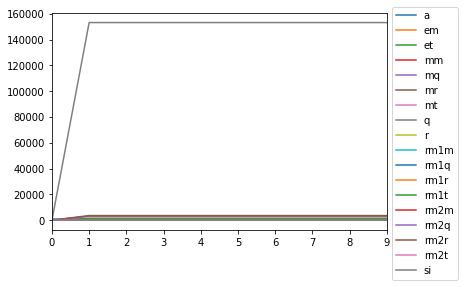

In [10]:
import pandas as pd
df = pd.DataFrame(columns=species,data = [y[i,:] for i in range(len(y))])

%matplotlib inline
df.plot(kind="line")
plt.legend(bbox_to_anchor=[1,1.05])

In [11]:
df

a           em           et         mm          mq          mr  \
0  1000.000000     0.000000     0.000000   0.000000     0.00000    0.000000   
1    10.517538  1432.098838  1432.098838  29.429624  3147.92546  214.665142   
2    10.517538  1432.098838  1432.098838  29.429624  3147.92546  214.665142   
3    10.517538  1432.098838  1432.098838  29.429624  3147.92546  214.665142   
4    10.517538  1432.098838  1432.098838  29.429624  3147.92546  214.665142   
5    10.517538  1432.098838  1432.098838  29.429624  3147.92546  214.665142   
6    10.517538  1432.098838  1432.098838  29.429624  3147.92546  214.665142   
7    10.517538  1432.098838  1432.098838  29.429624  3147.92546  214.665142   
8    10.517538  1432.098838  1432.098838  29.429624  3147.92546  214.665142   
9    10.517538  1432.098838  1432.098838  29.429624  3147.92546  214.665142   

          mt             q          r      rm1m        rm1q       rm1r  \
0   0.000000       0.00000  10.000000  0.000000    0.000000   0.000000   
1  29.429624  153183.75782   0.308337  2.158105  230.840691  15.741621   
2  29.429624  153183.75782   0.308337  2.158105  230.840691  15.741621   
3  29.429624  153183.75782   0.308337  2.158105  230.840691  15.741621   
4  29.429624  153183.75782   0.308337  2.158105  230.840691  15.741621   
5  29.429624  153183.75782   0.308337  2.158105  230.840691  15.741621   
6  29.429624  153183.75782   0.308337  2.158105  230.840691  15.741621   
7  29.429624  153183.75782   0.308337  2.158105  230.840691  15.741621   
8  29.429624  153183.75782   0.308337  2.158105  230.840691  15.741621   
9  29.429624  153183.75782   0.308337  2.158105  230.840691  15.741621   

       rm1t       rm2m         rm2q         rm2r       rm2t          si  
0  0.000000   0.000000     0.000000     0.000000   0.000000    0.000000  
1  2.158105  29.189805  3122.273337  3613.525456  29.189805  128.404576  
2  2.158105  29.189805  3122.273337  3613.525456  29.189805  128.404576  
3  2.158105  29.189805  3122.273337  3613.525456  29.189805  128.404576  
4  2.158105  29.189805  3122.273337  3613.525456  29.189805  128.404576  
5  2.158105  29.189805  3122.273337  3613.525456  29.189805  128.404576  
6  2.158105  29.189805  3122.273337  3613.525456  29.189805  128.404576  
7  2.158105  29.189805  3122.273337  3613.525456  29.189805  128.404576  
8  2.158105  29.189805  3122.273337  3613.525456  29.189805  128.404576  
9  2.158105  29.189805  3122.273337  3613.525456  29.189805  128.404576

In [12]:
massr = df[['rm2q','rm2r','rm2t','rm2m','r', 'rm1q', 'rm1r', 'rm1t', 'rm1m']] * 7549
massx = df[['em','et','q']] * 300
massr.sum(axis=1) + massx.sum(axis=1)

0    7.549000e+04
1    1.000000e+08
2    1.000000e+08
3    1.000000e+08
4    1.000000e+08
5    1.000000e+08
6    1.000000e+08
7    1.000000e+08
8    1.000000e+08
9    1.000000e+08
dtype: float64

In [5]:
gr = pd.DataFrame()
for val in np.arange(.1,.9,0.1):
    parameters[14] = val
    y= odeint(ribofinal, init, t, args= (rates, parameters), mxstep= 10000)
    mass = df[['rm2q','rm2r','rm2t','rm2m','em','et','r','q']]
    #gr[str(val)] = df[['rm2q','rm2r','rm2t','rm2m']].iloc[-1]

In [6]:
df.filter(regex=r'^[r|m.+]')

mm           mq          mr         mt         r      rm1m  \
0  29.408747  3127.123245  213.221561  29.408747  0.269642  0.966492   
1  29.429624  3147.925460  214.665142  29.429624  0.308337  2.158105   
2  29.429624  3147.925460  214.665142  29.429624  0.308337  2.158105   
3  29.429624  3147.925460  214.665142  29.429624  0.308337  2.158105   
4  29.429624  3147.925460  214.665142  29.429624  0.308337  2.158105   
5  29.429624  3147.925460  214.665142  29.429624  0.308337  2.158105   
6  29.429624  3147.925460  214.665142  29.429624  0.308337  2.158105   
7  29.429624  3147.925460  214.665142  29.429624  0.308337  2.158105   
8  29.429624  3147.925460  214.665142  29.429624  0.308337  2.158105   
9  29.429624  3147.925460  214.665142  29.429624  0.308337  2.158105   

         rm1q       rm1r      rm1t       rm2m         rm2q         rm2r  \
0  102.770062   7.007332  0.966492  29.650122  3152.797849  3628.127272   
1  230.840691  15.741621  2.158105  29.189805  3122.273337  3613.525456   
2  230.840691  15.741621  2.158105  29.189805  3122.273337  3613.525456   
3  230.840691  15.741621  2.158105  29.189805  3122.273337  3613.525456   
4  230.840691  15.741621  2.158105  29.189805  3122.273337  3613.525456   
5  230.840691  15.741621  2.158105  29.189805  3122.273337  3613.525456   
6  230.840691  15.741621  2.158105  29.189805  3122.273337  3613.525456   
7  230.840691  15.741621  2.158105  29.189805  3122.273337  3613.525456   
8  230.840691  15.741621  2.158105  29.189805  3122.273337  3613.525456   
9  230.840691  15.741621  2.158105  29.189805  3122.273337  3613.525456   

        rm2t  
0  29.650122  
1  29.189805  
2  29.189805  
3  29.189805  
4  29.189805  
5  29.189805  
6  29.189805  
7  29.189805  
8  29.189805  
9  29.189805